In [70]:
import pickle

with open('train_magnetism.pkl', 'rb') as f:
    train_magnetism = pickle.load(f)

with open('test_magnetism.pkl', 'rb') as f:
    test_magnetism = pickle.load(f)

In [71]:
print(len(train_magnetism))

31


In [72]:
# training and testing split

train = train_magnetism[2]
test = test_magnetism[2]

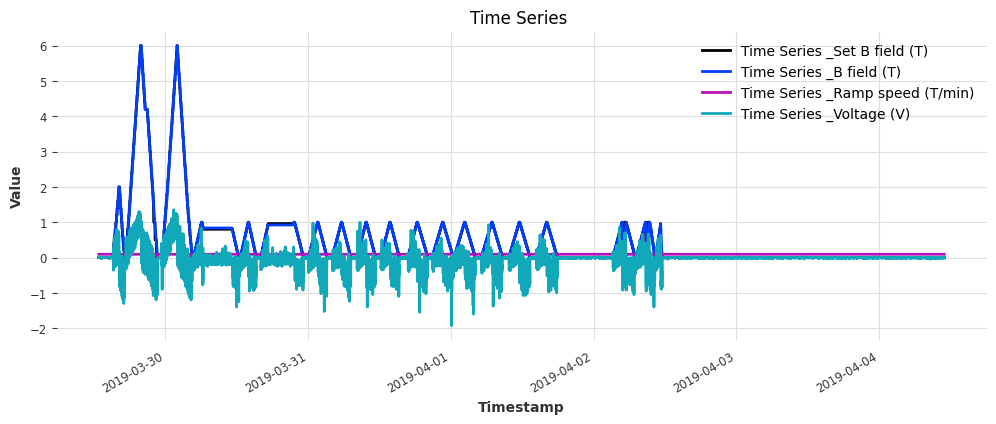

In [73]:
import matplotlib.pyplot as plt
from darts import TimeSeries

plt.figure(figsize=(12, 4))
train.plot(label=f'Time Series ')
plt.title(f'Time Series ')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

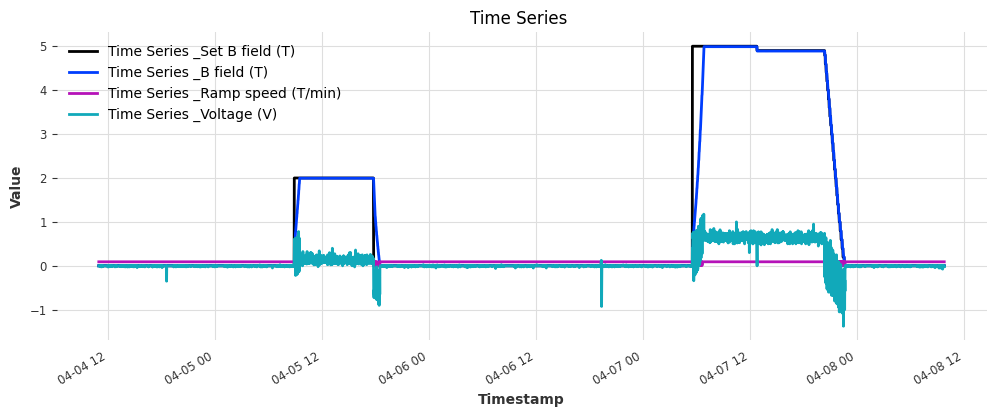

In [74]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming 'time_series_list' is the list of Darts TimeSeries objects

# Create a separate window for each time series
plt.figure(figsize=(12, 4))
test.plot(label=f'Time Series ')
plt.title(f'Time Series ')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [75]:
print(len(train))

8531


<Axes: xlabel='Timestamp'>

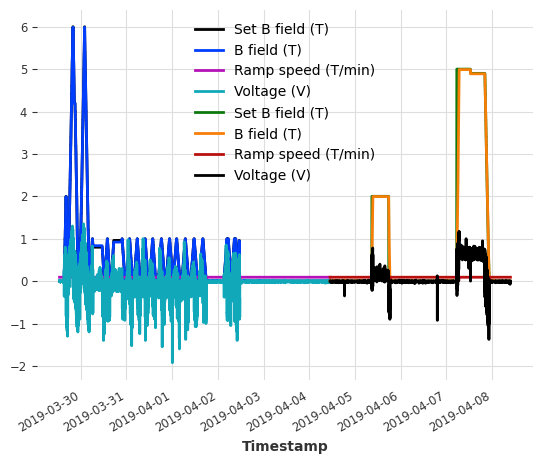

In [76]:
train.plot()
test.plot()

<Axes: xlabel='Timestamp'>

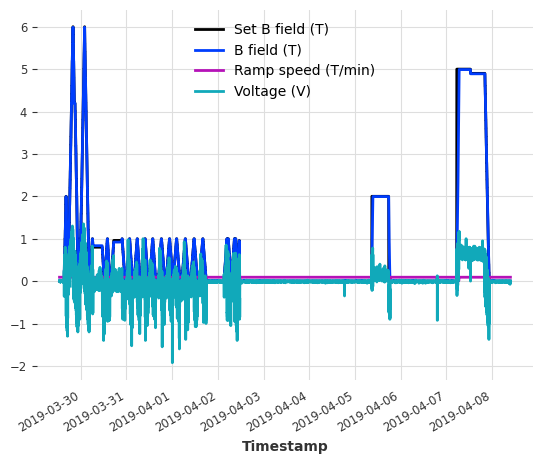

In [77]:
series = train.concatenate(test)
series.plot()

<Axes: xlabel='Timestamp'>

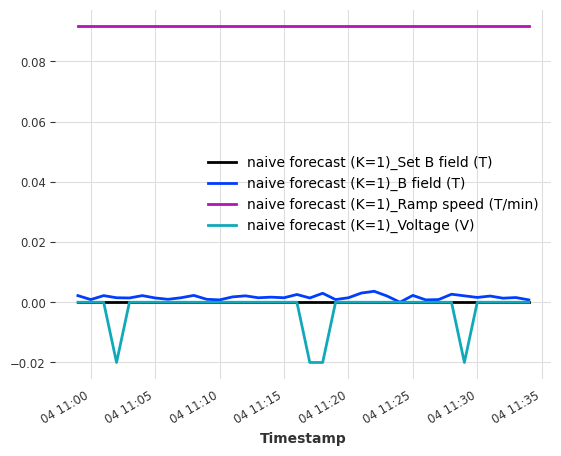

In [43]:
# even naive forecast seems to be finding some patterns
# i need to change set b field into a future covariate so that these 
# forecasts are more accurate 

from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=300)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

# test.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

# RNN Model With Univariate and Set B field as future covariate 

Index(['Set B field (T)', 'B field (T)', 'Ramp speed (T/min)', 'Voltage (V)'], dtype='object', name='component')


<Axes: xlabel='Timestamp'>

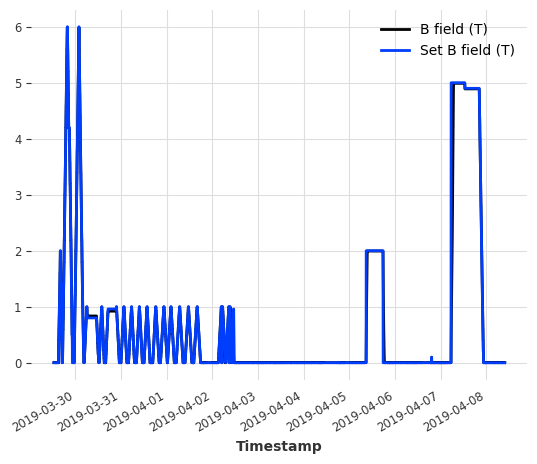

In [44]:
from darts import TimeSeries
from darts.models import RNNModel
from darts.metrics import mape
from darts.utils.timeseries_generation import gaussian_timeseries
# from darts import add_covariate

print(series.columns)

train_series = series['B field (T)']   # Assuming the first variable is your target
covariate_series = series['Set B field (T)'] # Assuming the second variable is your covariate

train_series.plot()
covariate_series.plot()

In [45]:
# RNN Model /Baseline

# Split the data into training and validation sets
train_size = int(len(series) * 0.5)
val_series = train_series[train_size:]
train_series = train_series[:train_size]
print(len(train_series))

7109


In [46]:
# Create an RNN model (you can choose other models based on your preference)
model = RNNModel(input_chunk_length=10, output_chunk_length=1, n_epochs=10)

# Fit the model to the training data
model.fit(train_series, future_covariates = covariate_series, verbose=True)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 725   
4 | V             | Linear           | 26    
---------------------------------------------------
751       Trainable params
0         Non-trainable params
751       Total params
0.003     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 222/222 [00:05<00:00, 42.43it/s, train_loss=0.00138] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 222/222 [00:05<00:00, 42.43it/s, train_loss=0.00138]


RNNModel(model=RNN, hidden_dim=25, n_rnn_layers=1, dropout=0.0, training_length=24, input_chunk_length=10, output_chunk_length=1, n_epochs=10)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:03<00:00,  0.32it/s]


<Axes: xlabel='Timestamp'>

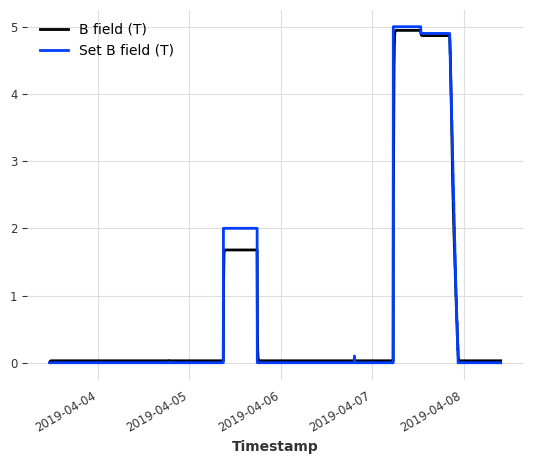

In [47]:
pred_series = model.predict(n=7110)
# print(len(val_series))
# print(len(val_series))
pred_series.plot()
# val_series.plot()
covariate_series[-7109:].plot()
# # Evaluate the performance using Mean Absolute Percentage Error (MAPE)
# mape_error = mape(val_series, pred_series)
# print(f'MAPE on validation set: {mape_error:.2f}%')

In [48]:
from darts.metrics import mape, marre, mse

print(marre(val_series,pred_series))
print(mse(val_series,pred_series))

1.6373388469219208
0.08253224


# RNN With Multivariate Target Data, but still only one future covariate

Index(['Set B field (T)', 'B field (T)', 'Ramp speed (T/min)', 'Voltage (V)'], dtype='object', name='component')


<Axes: xlabel='Timestamp'>

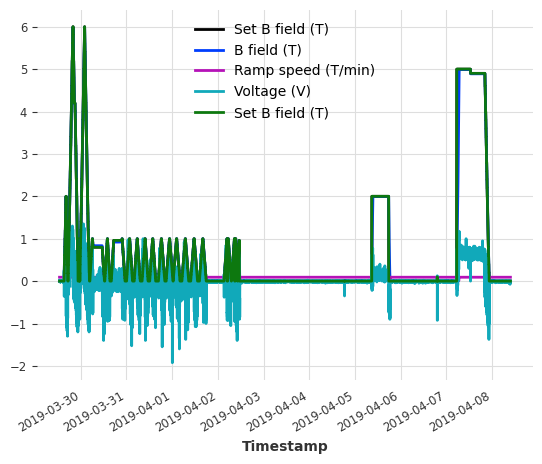

In [49]:
from darts import TimeSeries
from darts.models import RNNModel
from darts.metrics import mape
from darts.utils.timeseries_generation import gaussian_timeseries
# from darts import add_covariate

print(series.columns)

train_series = series  # Assuming the first variable is your target
covariate_series = series['Set B field (T)'] # Assuming the second variable is your covariate

train_series.plot()
covariate_series.plot()

In [50]:
# RNN Model /Baseline

# Split the data into training and validation sets
train_size = int(len(series) * 0.5)
val_series = train_series[train_size:]
train_series = train_series[:train_size]
print(len(train_series))

7109


In [51]:
# Create an RNN model (you can choose other models based on your preference)
model = RNNModel(input_chunk_length=10, output_chunk_length=1, n_epochs=10)

# Fit the model to the training data
model.fit(train_series, future_covariates = covariate_series, verbose=True)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 800   
4 | V             | Linear           | 104   
---------------------------------------------------
904       Trainable params
0         Non-trainable params
904       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 222/222 [00:05<00:00, 43.36it/s, train_loss=0.002]  

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 222/222 [00:05<00:00, 43.36it/s, train_loss=0.002]


RNNModel(model=RNN, hidden_dim=25, n_rnn_layers=1, dropout=0.0, training_length=24, input_chunk_length=10, output_chunk_length=1, n_epochs=10)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:03<00:00,  0.32it/s]


<Axes: xlabel='Timestamp'>

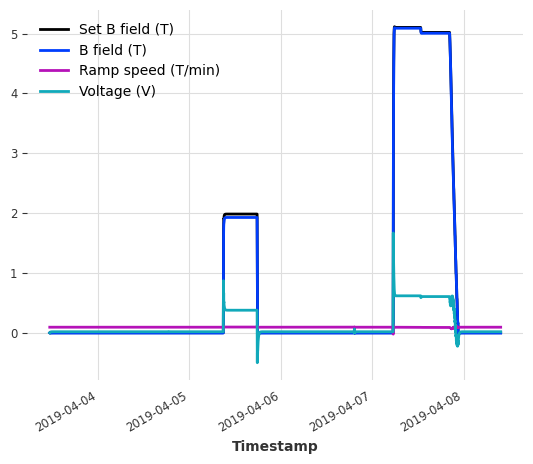

In [52]:
pred_series = model.predict(n=7110)
# print(len(val_series))
# print(len(val_series))
pred_series.plot()

<Axes: xlabel='Timestamp'>

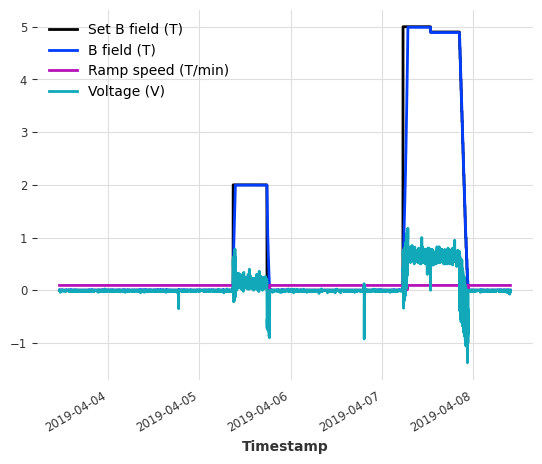

In [53]:
val_series.plot()

In [54]:
from darts.metrics import mape, marre, mse

print(marre(val_series,pred_series))
print(mse(val_series,pred_series))

1.5591732284519821
0.029540097


# Other variables as past covariates, set b field as future covariate, predicting b field, and voltage

Index(['Set B field (T)', 'B field (T)', 'Ramp speed (T/min)', 'Voltage (V)'], dtype='object', name='component')


<Axes: xlabel='Timestamp'>

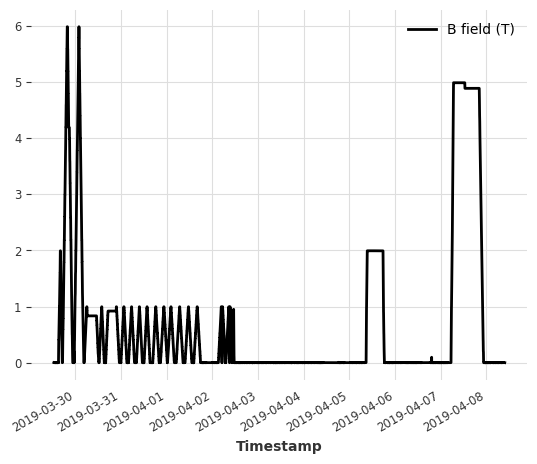

In [55]:
from darts import TimeSeries
from darts.models import RNNModel
from darts.metrics import mape
from darts.utils.timeseries_generation import gaussian_timeseries
# from darts.timeseries import stack
# from darts import add_covariate

print(series.columns)

train_series = series['B field (T)']  
other = series['Voltage (V)']
# train_series = train_series.stack(other)
future_covariate_series = series['Set B field (T)']
past_covariate_series = series['Ramp speed (T/min)']
past_covariate_series = past_covariate_series.stack(other)

train_series.plot()

In [56]:
# RNN Model /Baseline

# Split the data into training and validation sets
train_size = int(len(series) * 0.5)
val_series = train_series[train_size:]
train_series = train_series[:train_size]
past_covariate_series = past_covariate_series[:train_size]
print(len(train_series))

7109


In [65]:
from darts.datasets import WeatherDataset
from darts.models import XGBModel


# is there some way to hyperparanater tune in darts 


# predict 6 pressure values using the 12 past values of pressure and rainfall, as well as the 6 temperature
# values corresponding to the forecasted period
model = XGBModel(
    lags=40,
    lags_past_covariates=40,
    lags_future_covariates=[0,1,2,3,4,5],
    output_chunk_length=300,
)

model.fit(train_series, past_covariates=past_covariate_series, future_covariates=future_covariate_series)

XGBModel(lags=40, lags_past_covariates=40, lags_future_covariates=[0, 1, 2, 3, 4, 5], output_chunk_length=300, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True)

<Axes: xlabel='Timestamp'>

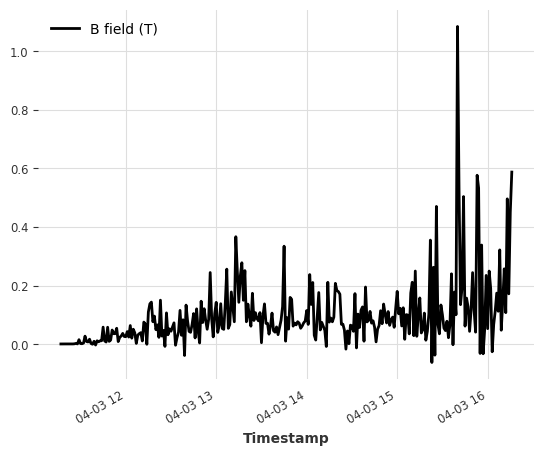

In [66]:
pred = model.predict(300)
pred.plot()

<Axes: xlabel='Timestamp'>

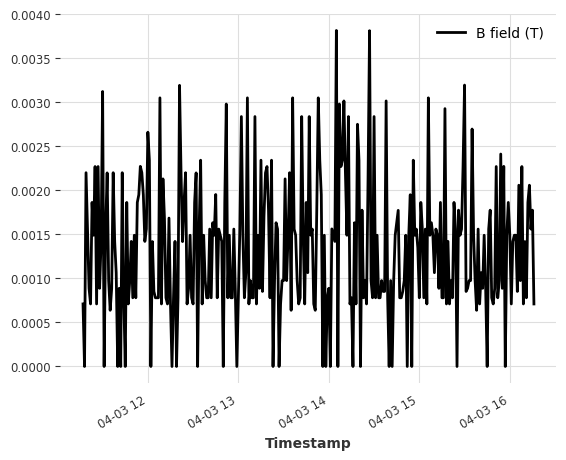

In [67]:
val_series[:300].plot()

In [68]:
from darts.datasets import WeatherDataset
from darts.models import RandomForest


# is there some way to hyperparanater tune in darts 


# predict 6 pressure values using the 12 past values of pressure and rainfall, as well as the 6 temperature
# values corresponding to the forecasted period
model = RandomForest(
    lags=40,
    lags_past_covariates=40,
    lags_future_covariates=[0,1,2,3,4,5],
    output_chunk_length=300,
)

model.fit(train_series, past_covariates=past_covariate_series, future_covariates=future_covariate_series)

RandomForest(lags=40, lags_past_covariates=40, lags_future_covariates=[0, 1, 2, 3, 4, 5], output_chunk_length=300, add_encoders=None, n_estimators=100, max_depth=None, multi_models=True, use_static_covariates=True)

<Axes: xlabel='Timestamp'>

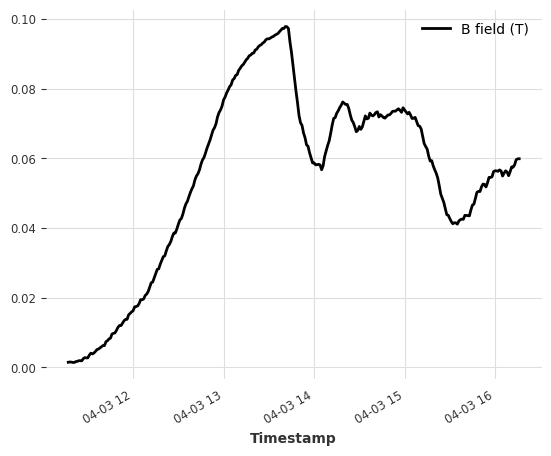

In [69]:
pred = model.predict(300)
pred.plot()

In [62]:
# val_series.plot()